In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import csv
import pandas as pd

file_path = '/content/drive/MyDrive/FrontrunnningData/disp_attacks.csv'
# List to store data from CSV
df = pd.read_csv(file_path)


In [ ]:
df.head()

,blockHash,blockNumber,hash,input,from,to,value,gasPrice,gas,nonce,chainId,type,r,s,v,Label
0,"b""\x89,:\xb8\xd4\x98Z6\xa4\x15\xa7'%\xb5\x9a\x...",1929171,b'\x8aG\xa1>p\xe1<\xa7C\xb4\xf0L\xfcU\xe3\x1c%...,b'',0x27BebC44c6f60f99D558422288d616eE15DcB36d,0x3beC06708FE8eE10FB633a243520f2924545e748,4439881390000000000,23987975820,90000,25266,NaN,0,b'J\x88\x8e&i\x92yJ\xb1\t^\xb5^\x0c\xbf\xeaK\x...,b'1N\x14\x8cDO-\xe1A!b\x1a\x9a\xb5l\x03%Pv\x84...,28,Not Attack
1,"b""\x89,:\xb8\xd4\x98Z6\xa4\x15\xa7'%\xb5\x9a\x...",1929171,"b'\xb6\xf8\xc0\x97\x11,?a\x8f\xc7vr\x9f\x9d\xa...",b'',0x27BebC44c6f60f99D558422288d616eE15DcB36d,0x3beC06708FE8eE10FB633a243520f2924545e748,3972146630000000000,23987975820,90000,25267,NaN,0,b'\xadm\xf1\x0bK\x1d\xb6=\x1a\xe9E2\x8a\xed\xf...,b'9\x0b\xacC\xd9\xae\xd2\x1e\xfb\xa0\xc6\xf5\x...,28,Not Attack
2,"b""\x89,:\xb8\xd4\x98Z6\xa4\x15\xa7'%\xb5\x9a\x...",1929171,b'\x13a\x94\xe51\xa3\xcfo;\xc5\x9e\r\xc1\x1f\x...,b'',0x91fCcD0C64dA5e5bb22a748f28d83f3a09024F1d,0xa0EeA1ED0cbaFB0f18C01d214829Ab408BF9EB05,10000000000000000000,23654516833,90000,0,NaN,0,b'\x12\xb7\x1a\xe5\xc1j\x97\xcf\xe6\xdc\tj\x06...,b'|\x06\xb1\xe2\xd5\xe3\xec\x00\x91\xd5b=Qdj\x...,28,Not Attack
3,"b""\x89,:\xb8\xd4\x98Z6\xa4\x15\xa7'%\xb5\x9a\x...",1929171,b'QE\x99u<G\xc0\xad\xbe]r\xcb>X\xfbS\xc7\x9d\x...,b'',0x1fEF489870f2c5dA234cF2b17F40a9EBf6D517C2,0xFBb1b73C4f0BDa4f67dcA266ce6Ef42f520fBB98,220372375229785150,21738084817,22050,206,NaN,0,b'\xdaC\xc9I\\~\xcd\xdb\xa2\x87}\xb2\xa4\\E0\x...,b'&_\xfa&\xe5\xb2\x04__\xdbU\xaaB}\xfbP-0\x90\...,28,Not Attack
4,"b""\x89,:\xb8\xd4\x98Z6\xa4\x15\xa7'%\xb5\x9a\x...",1929171,b'\xc3\xdd\xf5v\xb2\xf9\x15rDx\xc1\xa1K\xc5\x9...,"b""\xb6\x1d'\xf6\x00\x00\x00\x00\x00\x00\x00\x0...",0xBa411E2E417794a327503C772684e85738a698b2,0x0E3358cA80A0e6Ef98C49747e2533b525d2a7A3b,0,21612736762,300000,9,NaN,0,b'\xc5\xa7Fan\xa6\xa1\x97\x18\x7f\xdb\xdf\x15\...,b'\rR\\$\xbb8\xc4g\xd0\xa3\xe2&*NPX\xcd\xc9cq5...,28,Attack


In [ ]:
df['Label'].value_counts()

Label
Not Attack    523123
Attack          6870
Name: count, dtype: int64

In [ ]:
data_list = df.to_dict(orient='records')

In [ ]:
def prepare_sequences(transactions_data):
    sequences = []
    sequence = []
    for i in range(14):

      gas_price_str = transactions_data[i]
      gas_price_float = float(gas_price_str)
      sequence.append(gas_price_float)
      seq = []
      for j in range(14 - i - 1):
        gas_price_str = transactions_data[0]
        gas_price_float = float(gas_price_str)
        seq.append(gas_price_float)
      seq.extend(sequence)
      sequences.append(seq)
    for i in range(len(transactions_data) - 14):  # For each transaction, take the last 15 transactions
        sequence = []
        for j in range(14):
            # print(transactions_data[i + j]['gas_price'])
            gas_price_str = transactions_data[i + j]
            gas_price_float = float(gas_price_str)
            sequence.append(gas_price_float)
        sequences.append(sequence)
    return sequences

In [ ]:
# Standard Scaling the Gas Prices
import numpy as np
gas_prices = []
sum = 0
cnt = 0
for row in data_list:
  gas_prices.append(row['gasPrice'])
  sum = sum + row['gasPrice']
  cnt = cnt + 1
  if np.isnan(row['gasPrice']) :
    # print(row['gasPrice'])
    print(cnt)
    # break
# print(sum)
mean = np.mean(gas_prices)
std_dev = np.std(gas_prices)
print("Mean:", mean)
print("Std Dev:", std_dev)

print(gas_prices[0])
for i in range(len(gas_prices)):
  gas_prices[i] = (gas_prices[i] - mean) / std_dev
print(gas_prices[0])

Mean: 104079941768.8482
Std Dev: 1702618552810.2974
23987975820
-0.04704046353579932


In [ ]:
import pickle

with open('/content/drive/MyDrive/FrontrunnningData/lstm_model.pkl', 'rb') as file:
    # Serialize and save the model to the file
    lstm_model = pickle.load(file)

In [ ]:
sequences = prepare_sequences(gas_prices)
print(len(sequences))
print(len(data_list))
sequences_scaled = np.array(sequences)

X = np.reshape(sequences_scaled[:, ], (sequences_scaled.shape[0], sequences_scaled.shape[1], 1))

529993
529993


In [ ]:
def inv_transform(y_pred):
  y = y_pred.copy()
  for i in range(len(y)):
    y[i] = (y[i]*std_dev) + mean
  return y


y_pred = lstm_model.predict(X)
y_pred_inv = inv_transform(y_pred)

16563/16563 [==============================] - 108s 6ms/step


In [ ]:
def calculate_mean_gas_price_by_eoa(transactions_data):
    eoa_gas_prices = {}  # Dictionary to store gas prices for each EOA
    eoa_transaction_counts = {}  # Dictionary to store transaction counts for each EOA

    # Iterate through transactions data
    for transaction in transactions_data:
        sender_eoa = transaction['from']
        gas_price = transaction['gasPrice']
        gas_price = float(gas_price)
        # Update gas prices for the sender's EOA
        if sender_eoa in eoa_gas_prices:
            eoa_gas_prices[sender_eoa].append(gas_price)
            eoa_transaction_counts[sender_eoa] += 1
        else:
            eoa_gas_prices[sender_eoa] = [gas_price]
            eoa_transaction_counts[sender_eoa] = 1

    # Calculate mean gas price for each EOA
    mean_gas_price_by_eoa = {}
    std_dev_gas_price_by_eoa = {}

    for eoa, gas_prices in eoa_gas_prices.items():
        mean_gas_price_by_eoa[eoa] = np.mean(gas_prices)
        std_dev_gas_price_by_eoa[eoa] = np.std(gas_prices)

    return mean_gas_price_by_eoa, std_dev_gas_price_by_eoa


# Calculate mean gas price by EOA
mean_gas_price_by_eoa, std_dev_gas_price_by_eoa = calculate_mean_gas_price_by_eoa(data_list)

# Print mean gas price by EOA
# for eoa, mean_gas_price in mean_gas_price_by_eoa.items():
#     print(f"EOA: {eoa}, Mean Gas Price: {mean_gas_price}")


In [ ]:
# Calculate mean gas price and std deviation of gas price per block
def calculate_stats_gas_price_by_block(transactions_data):
    block_gas_prices = {}  # Dictionary to store gas prices for each block
    block_transaction_counts = {}  # Dictionary to store transaction counts for each block

    # Iterate through transactions data
    for transaction in transactions_data:
        blockNumber = transaction['blockNumber']
        gas_price = transaction['gasPrice']
        gas_price = float(gas_price)

        if blockNumber in block_gas_prices:
            block_gas_prices[blockNumber].append(gas_price)
            block_transaction_counts[blockNumber] += 1
        else:
            block_gas_prices[blockNumber] = [gas_price]
            block_transaction_counts[blockNumber] = 1

    # Calculate mean gas price for each block
    mean_gas_price_by_block = {}
    std_dev_gas_price_by_block = {}

    for block, gas_prices in block_gas_prices.items():
        mean_gas_price_by_block[block] = np.mean(gas_prices)
        std_dev_gas_price_by_block[block] = np.std(gas_prices)

    return mean_gas_price_by_block, std_dev_gas_price_by_block


# Calculate mean gas price by block
mean_gas_price_by_block, std_dev_gas_price_by_block = calculate_stats_gas_price_by_block(data_list)

# Print mean gas price by EOA
# for eoa, mean_gas_price in mean_gas_price_by_eoa.items():
#     print(f"EOA: {eoa}, Mean Gas Price: {mean_gas_price}")


In [ ]:
# Process data and calculate features
def extract_features(transactions_data, y):
    feature_vectors = []
    cnt = 0
    for transaction in transactions_data:
        # print(transaction.blockNumber)
        feature_vector = []
        # 1. Gas Price of the Transaction
        gas_price = transaction['gasPrice']
        feature_vector.append(gas_price)
        # 2. Predicted Gas Price
        feature_vector.append(y[cnt][0])
        cnt =  cnt + 1
        # 3. Mean Gas Price of Transactions by the same EOA
        mean_by_eoa = mean_gas_price_by_eoa[transaction['from']]
        # print(mean_by_eoa)
        feature_vector.append(mean_by_eoa)
        # 4. Standard Deviation of Gas Price in Transactions by the same EOA
        std_dev_by_eoa = std_dev_gas_price_by_eoa[transaction['from']]
        feature_vector.append(std_dev_by_eoa)
        # 5. Mean Gas Price of Transactions by the same block
        mean_by_block = mean_gas_price_by_block[transaction['blockNumber']]
        feature_vector.append(mean_by_block)
        # 6. Standard Deviation of Gas Price in Transactions by the same EOA
        std_dev_by_block = std_dev_gas_price_by_block[transaction['blockNumber']]
        feature_vector.append(std_dev_by_block)
        # feature_vector.append(transaction['Label'])
        feature_vectors.append(feature_vector)
    # df = pd.DataFrame(feature_vectors, columns = ['gas_price', 'pred_gas_price', 'mean_by_eoa', 'std_dev_by_eoa', 'mean_by_block', 'std_dev_by_block', 'Label'])
    return feature_vectors

feature_vectors = extract_features(data_list, y_pred_inv)
# feature_vectors_test = extract_features(data_list_test, y_pred)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Sample feature vectors and labels
# Assuming 'data_list' and 'feature_vectors' are defined elsewhere
labels = ['Attack' if label['Label'] == 'Attack' else 'Not Attack' for label in data_list]
# Convert lists to numpy arrays
X = np.array(feature_vectors, dtype=np.float32)
y = np.array(labels)
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X = scaler.fit_transform(X)
# Convert labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Calculate the index to split the data
split_index = int(0.8 * len(X))

# Split the data into training and testing sets
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y_encoded[:split_index], y_encoded[split_index:]

Epoch [0/50], Train Loss: 0.8395, Test Loss: 0.8456, Train Accuracy: 0.0349, Test Accuracy: 0.0393
Epoch [10/50], Train Loss: 0.8066, Test Loss: 0.8104, Train Accuracy: 0.0583, Test Accuracy: 0.0615
Epoch [20/50], Train Loss: 0.7746, Test Loss: 0.7764, Train Accuracy: 0.1117, Test Accuracy: 0.1084
Epoch [30/50], Train Loss: 0.7432, Test Loss: 0.7432, Train Accuracy: 0.1936, Test Accuracy: 0.2045
Epoch [40/50], Train Loss: 0.7119, Test Loss: 0.7106, Train Accuracy: 0.3995, Test Accuracy: 0.3404
Epoch [50/50], Train Loss: 0.6804, Test Loss: 0.6784, Train Accuracy: 0.5724, Test Accuracy: 0.4906


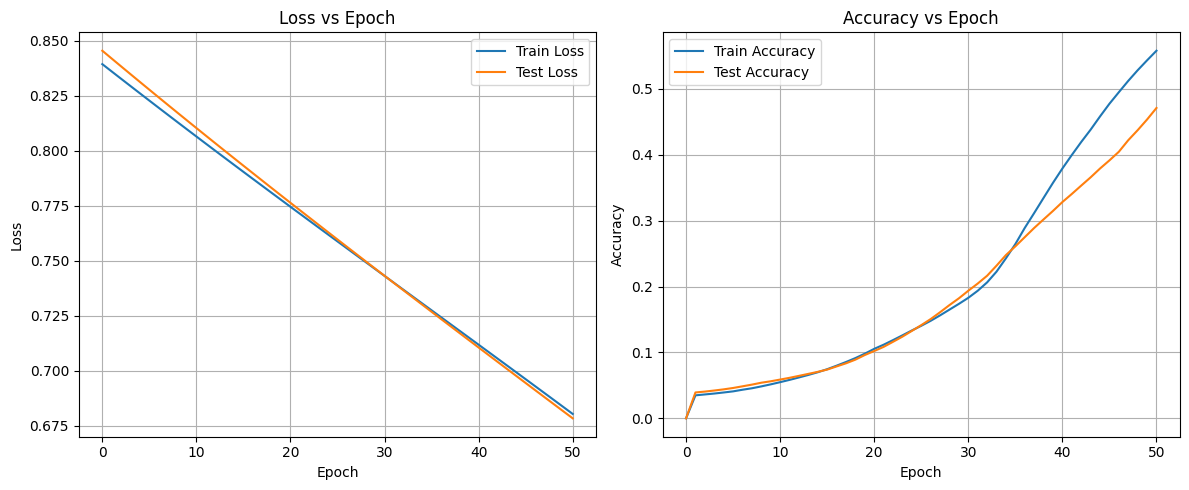

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Define custom MLP classifier model
class MLPClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MLPClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

# Sample feature vectors and labels
# Assuming 'data_list' and 'feature_vectors' are defined elsewhere
labels = ['Attack' if label['Label'] == 'Attack' else 'Not Attack' for label in data_list]
# Set seed for PyTorch
# torch.manual_seed(7)
# np.random.seed(42)
# Convert lists to numpy arrays
X = np.array(feature_vectors, dtype=np.float32)
y = np.array(labels)
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X = scaler.fit_transform(X)
# Convert labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Calculate the index to split the data
split_index = int(0.75 * len(X))

# Split the data into training and testing sets
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y_encoded[:split_index], y_encoded[split_index:]

# Hyperparameters
input_size = X_train.shape[1]  # Number of features
hidden_size = 10  # Number of neurons in hidden layer
num_classes = len(np.unique(y))  # Number of output classes
learning_rate = 0.001
num_epochs = 50

# Initialize the model
model = MLPClassifier(input_size=input_size, hidden_size=hidden_size, num_classes=num_classes)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []
y_pred = []
train_acc = 0
test_acc = 0
for epoch in range(num_epochs+1):

    # Convert numpy arrays to PyTorch tensors
    inputs = torch.tensor(X_train)
    targets = torch.tensor(y_train)

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Track train loss
    train_losses.append(loss.item())


    # Calculate accuracy on training set
    with torch.no_grad():
        train_accuracies.append(train_acc)
        train_pred = torch.argmax(outputs, axis=1)
        train_acc = torch.sum(train_pred == targets).item() / len(targets)


        # Calculate test loss

        inputs_test = torch.tensor(X_test)
        targets_test = torch.tensor(y_test)
        outputs_test = model(inputs_test)
        loss_test = criterion(outputs_test, targets_test)
        test_losses.append(loss_test.item())

        # Calculate accuracy on test set
        test_accuracies.append(test_acc)
        test_pred = torch.argmax(outputs_test, axis=1)
        y_pred = test_pred
        test_acc = torch.sum(test_pred == targets_test).item() / len(targets_test)


    # Print progress
    if (epoch) % 10 == 0:
        print(f'Epoch [{epoch}/{num_epochs}], Train Loss: {loss.item():.4f}, Test Loss: {loss_test.item():.4f}, Train Accuracy: {train_acc:.4f}, Test Accuracy: {test_acc:.4f}')

# Plot Loss and Accuracy vs Epoch
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(0, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(0, num_epochs + 1), test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(0, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(0, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Epoch')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import StandardScaler, LabelEncoder

# Sample feature vectors and labels
# Assuming 'data_list' and 'feature_vectors' are defined elsewhere
labels = ['Attack' if label['Label'] == 'Attack' else 'Not Attack' for label in data_list]

# Convert lists to numpy arrays
X = np.array(feature_vectors, dtype=np.float32)
y = np.array(labels)
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler to the data and transform the data
X = scaler.fit_transform(X)
# Convert labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Calculate the index to split the data
split_index = int(0.8 * len(X))

# Split the data into training and testing sets
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y_encoded[:split_index], y_encoded[split_index:]



# Create an MLP classifier with 2 hidden layers, each having 10 neurons
mlp_classifier = MLPClassifier(hidden_layer_sizes=(10, 10), activation='logistic', solver='adam', random_state=1)
# Initialize lists to store training and testing accuracies at each epoch
train_accuracies = []
test_accuracies = []

# Train the classifier for each epoch and record the accuracies
for epoch in range(1, 51):  # Training for 100 epochs
    # Train the classifier on the training data
    mlp_classifier.partial_fit(X_train, y_train, classes=np.unique(y_train))

    # Calculate training accuracy
    y_train_pred = mlp_classifier.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_accuracies.append(train_accuracy)

    # Calculate testing accuracy
    y_test_pred = mlp_classifier.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_accuracies.append(test_accuracy)


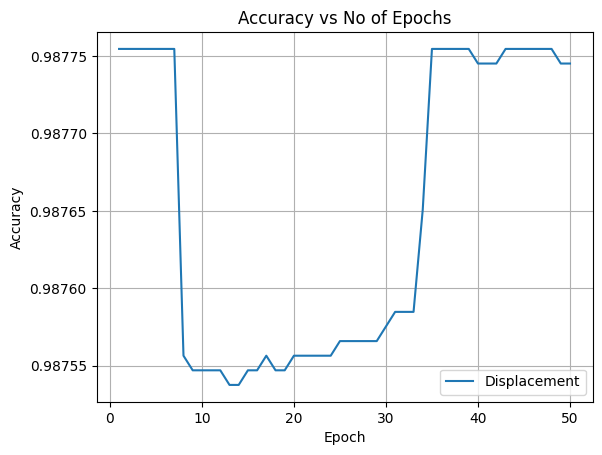

In [ ]:

# Plot Accuracy vs No of epochs
# plt.plot(range(1, 51), train_accuracies, label='Displacement')
plt.plot(range(1, 51), test_accuracies, label='Displacement')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy vs No of Epochs')
plt.legend()
plt.grid(True)
plt.savefig('/content/dispMLP.png')
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
# Calculate precision score
precision = precision_score(y_test, y_pred, pos_label=0)

# Calculate recall score
recall = recall_score(y_test, y_pred, pos_label=0)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label=0)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# # Calculate ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, mlp_classifier.predict_proba(X_test)[:,1])

# # Calculate AUC
# auc_score = auc(fpr, tpr)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)
# print("AUC Score:", auc_score)

# Plot ROC curve
# plt.figure()
# plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
# plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend(loc="lower right")
# plt.show()


Accuracy: 0.9812262379833772
Precision: 0.023415977961432508
Recall: 0.013097072419106317
F1 Score: 0.016798418972332016
Confusion Matrix:
 [[    17   1281]
 [   709 103992]]


In [ ]:
print("Train Counts:")
counts = np.bincount(y_train)
print("Count of 0's:", counts[0])
print("Count of 1's:", counts[1])
print("Test Counts:")
counts = np.bincount(y_test)
print("Count of 0's:", counts[0])
print("Count of 1's:", counts[1])
print("Pred Counts:")
counts = np.bincount(y_pred)
print("Count of 0's:", counts[0])
print("Count of 1's:", counts[1])
# print(y)
# print(y_encoded)

Train Counts:
Count of 0's: 5572
Count of 1's: 418422
Test Counts:
Count of 0's: 1298
Count of 1's: 104701
Pred Counts:
Count of 0's: 726
Count of 1's: 105273


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Create the XGBoost classifier
# Use 'binary:logistic' objective function for binary classification
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', seed=42)

# Set the class weights to handle imbalanced data
# Calculate the class weights
class_counts = np.bincount(y_train)
cls_wt = {0:class_counts[0], 1:class_counts[1]}

pos_weight = (class_counts[0] + class_counts[1]) / 2
xgb_classifier.set_params(scale_pos_weight=pos_weight, class_weight = cls_wt)

# Train the classifier
xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:38:06] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "class_weight" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9994056547703281
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1298
           1       1.00      1.00      1.00    104701

    accuracy                           1.00    105999
   macro avg       1.00      0.98      0.99    105999
weighted avg       1.00      1.00      1.00    105999



Precision: 0.9983857949959645
Recall: 0.9530046224961479
F1 Score: 0.9751675206937327
Confusion Matrix:
 [[  1237     61]
 [     2 104699]]
AUC Score: 0.9864137291151003


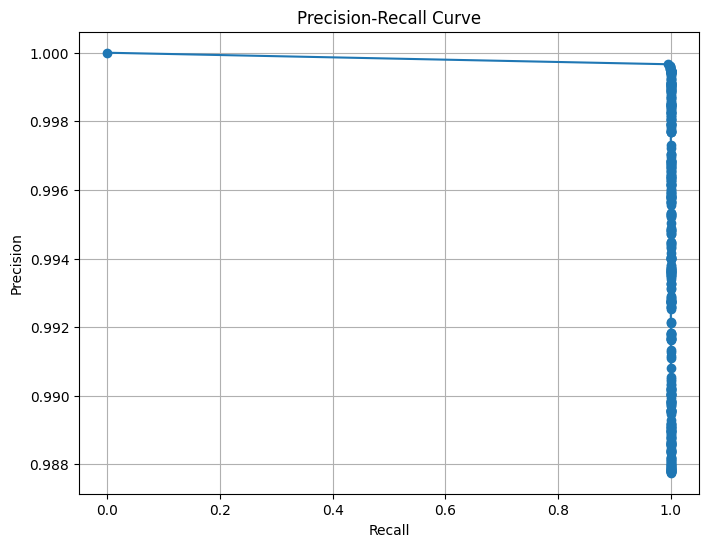

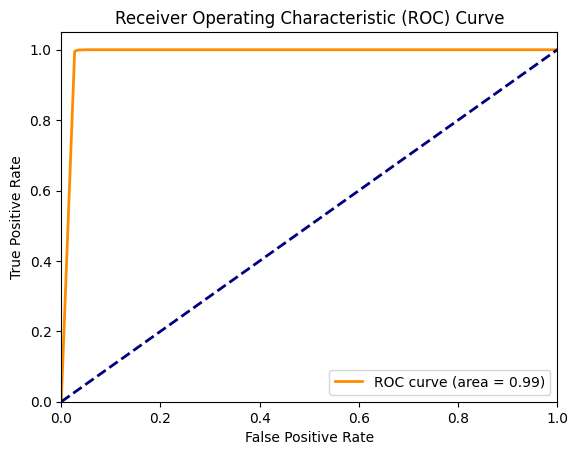

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision score
precision = precision_score(y_test, y_pred, pos_label=0)

# Calculate recall score
recall = recall_score(y_test, y_pred, pos_label=0)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label=0)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_classifier.predict_proba(X_test)[:,1])

# Calculate AUC
auc_score = auc(fpr, tpr)


y_proba = xgb_classifier.predict_proba(X_test)[:, 1]



# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)
print("AUC Score:", auc_score)


# Generate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

print(" ")

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb


# Create the XGBoost classifier
# Use 'binary:logistic' objective function for binary classification
xgb_classifier = xgb.XGBClassifier(objective='binary:logistic', seed=42)

# Define hyperparameters grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Perform grid search
random_search = RandomizedSearchCV(estimator=xgb_classifier, param_distributions=param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)




# Get the best parameters found by grid search
best_params = random_search.best_params_

print(best_params)

# Train the classifier with the best parameters
best_xgb_classifier = xgb.XGBClassifier(**best_params)
best_xgb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_xgb_classifier.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report
print(classification_report(y_test, y_pred))


{'subsample': 0.9, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.01, 'colsample_bytree': 0.9}
Accuracy: 0.999433956924122
              precision    recall  f1-score   support

           0       1.00      0.95      0.98      1298
           1       1.00      1.00      1.00    104701

    accuracy                           1.00    105999
   macro avg       1.00      0.98      0.99    105999
weighted avg       1.00      1.00      1.00    105999



Precision: [0.9877546  0.99285003 0.99285945 ... 1.         1.         1.        ]
Recall: [1.         1.         1.         ... 0.05170915 0.03546289 0.        ]
F1 Score: 0.9763406940063092
Confusion Matrix:
 [[  1238     60]
 [     0 104701]]
AUC Score: 0.9886281095205898


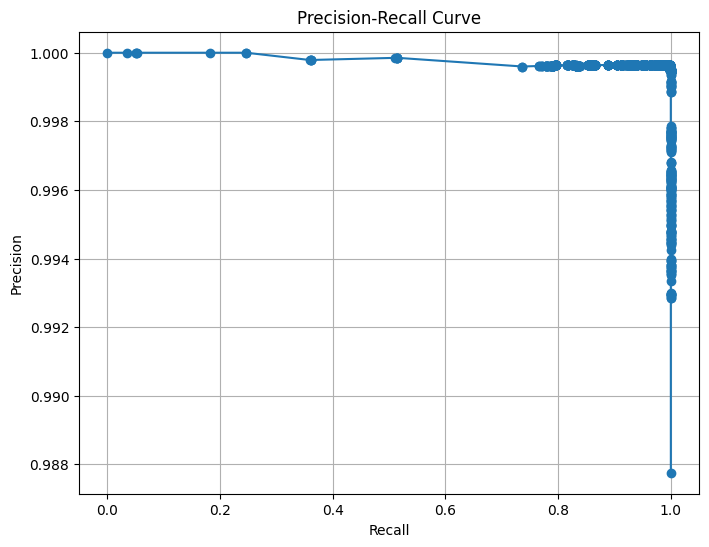

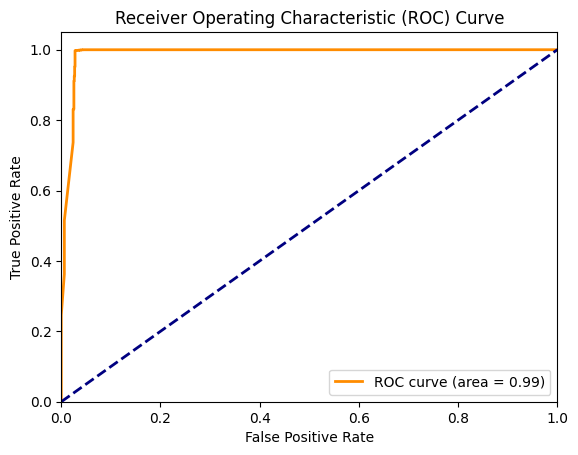

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt

# Calculate precision score
precision = precision_score(y_test, y_pred, pos_label=0)

# Calculate recall score
recall = recall_score(y_test, y_pred, pos_label=0)

# Calculate F1 score
f1 = f1_score(y_test, y_pred, pos_label=0)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, best_xgb_classifier.predict_proba(X_test)[:,1])

# Calculate AUC
auc_score = auc(fpr, tpr)

y_proba = best_xgb_classifier.predict_proba(X_test)[:, 1]


# Generate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)
print("AUC Score:", auc_score)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='o')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)

# Evaluate Random Forest Classifier
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Classifier Accuracy:", rf_accuracy)
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, rf_y_pred))



Random Forest Classifier Accuracy: 0.9996603741544732
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99      1298
           1       1.00      1.00      1.00    104701

    accuracy                           1.00    105999
   macro avg       1.00      0.99      0.99    105999
weighted avg       1.00      1.00      1.00    105999



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate precision score
precision = precision_score(y_test, rf_y_pred, pos_label=0)

# Calculate recall score
recall = recall_score(y_test, rf_y_pred, pos_label=0)

# Calculate F1 score
f1 = f1_score(y_test, rf_y_pred, pos_label=0)

# Calculate confusion matrix
cm = confusion_matrix(y_test, rf_y_pred)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])

# Calculate AUC
auc_score = auc(fpr, tpr)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)
print("AUC Score:", auc_score)


Precision: 1.0
Recall: 0.9722650231124808
F1 Score: 0.9859375
Confusion Matrix:
 [[  1262     36]
 [     0 104701]]
AUC Score: 0.9877555426047102


In [ ]:
from sklearn.ensemble import IsolationForest

random_state = np.random.RandomState(42)
# Isolation Forest Classifier
if_classifier = IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)
if_classifier.fit(X_train, y_train)
if_y_pred = if_classifier.predict(X_test)

y_pred_binary = [0 if pred == -1 else 1 for pred in if_y_pred]
if_accuracy = accuracy_score(y_test, y_pred_binary)
print("\nIsolation Forest Classifier Accuracy:", if_accuracy)
print("Isolation Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_binary))


Isolation Forest Classifier Accuracy: 0.7588090453683526
Isolation Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.01      0.18      0.02      1298
           1       0.99      0.77      0.86    104701

    accuracy                           0.76    105999
   macro avg       0.50      0.47      0.44    105999
weighted avg       0.97      0.76      0.85    105999



In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Calculate precision score
precision = precision_score(y_test, y_pred_binary, pos_label=0)

# Calculate recall score
recall = recall_score(y_test, y_pred_binary, pos_label=0)

# Calculate F1 score
f1 = f1_score(y_test, y_pred_binary, pos_label=0)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred_binary)

# # Calculate ROC curve
# fpr, tpr, thresholds = roc_curve(y_test, rf_classifier.predict_proba(X_test)[:,1])

# # Calculate AUC
# auc_score = auc(fpr, tpr)

# Print the evaluation metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", cm)
# print("AUC Score:", auc_score)


Precision: 0.00938055959890021
Recall: 0.17873651771956856
F1 Score: 0.017825585862466384
Confusion Matrix:
 [[  232  1066]
 [24500 80201]]
